In [75]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier

In [76]:
df=pd.read_csv('risk_factors_cervical_cancer_cleaned.csv')

Taking all the columns for building a model

In [77]:
# KNeighborsClassifier

# Create arrays for the features and the response variable
y = df['Biopsy'].values
X = df.drop('Biopsy', axis=1).values

# Split into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42, stratify=y)

# Instantiate a k-NN classifier: knn
knn = KNeighborsClassifier(n_neighbors=2)

# Fit the classifier to the training data
knn.fit(X_train, y_train)

# Predict the labels of the test data: y_pred
y_pred = knn.predict(X_test)

# Generate the confusion matrix and classification report
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


[[160   1]
 [ 10   1]]
             precision    recall  f1-score   support

          0       0.94      0.99      0.97       161
          1       0.50      0.09      0.15        11

avg / total       0.91      0.94      0.91       172



Taking only highly correlated columns for building a model

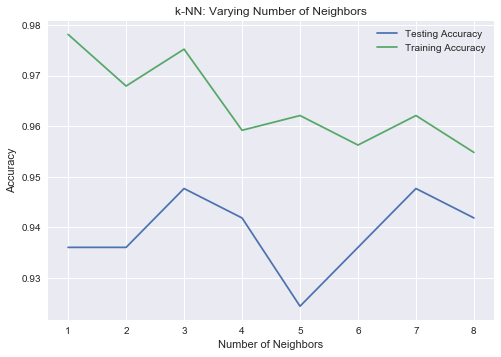

[[158   3]
 [  6   5]]
             precision    recall  f1-score   support

          0       0.96      0.98      0.97       161
          1       0.62      0.45      0.53        11

avg / total       0.94      0.95      0.94       172



In [78]:
# KNeighborsClassifier

# Create arrays for the features and the response variable
y = df['Biopsy'].values
X = pd.concat([df['Schiller'], 
               df['Hinselmann'], 
               df['Citology'],
               df['STDs:genital herpes'],
               df['STDs:HIV'],
               df['STDs (number)'],
               df['Hormonal Contraceptives (years)']], axis=1).values

# Split into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42, stratify=y)
# Setup arrays to store train and test accuracies
neighbors = np.arange(1, 9)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

# Loop over different values of k
for i, k in enumerate(neighbors):
    # Setup a k-NN Classifier with k neighbors: knn
    knn = KNeighborsClassifier(n_neighbors=k)

    # Fit the classifier to the training data
    knn.fit(X_train, y_train)
    
    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train, y_train)

    #Compute accuracy on the testing set
    test_accuracy[i] = knn.score(X_test, y_test)

# Generate plot
plt.title('k-NN: Varying Number of Neighbors')
plt.plot(neighbors, test_accuracy, label = 'Testing Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()

# Create training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42, stratify=y)

# Instantiate a k-NN classifier: knn
knn = KNeighborsClassifier(n_neighbors=3)

# Fit the classifier to the training data
knn.fit(X_train, y_train)

# Predict the labels of the test data: y_pred
y_pred = knn.predict(X_test)

# Generate the confusion matrix and classification report
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))



In [79]:
# DecisionTreeClassifier

# Create arrays for the features and the response variable
y = df['Biopsy'].values
X = pd.concat([df['Schiller'], 
               df['Hinselmann'], 
               df['Citology'],
               df['STDs:genital herpes'],
               df['STDs:HIV'],
               df['STDs (number)'],
               df['Hormonal Contraceptives (years)']], axis=1).values

# Split into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42, stratify=y)

# Instantiate a DecisionTreeClassifier: clf
clf = tree.DecisionTreeClassifier()

# Fit the classifier to the training data
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

# Generate the confusion matrix and classification report
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))



[[158   3]
 [  6   5]]
             precision    recall  f1-score   support

          0       0.96      0.98      0.97       161
          1       0.62      0.45      0.53        11

avg / total       0.94      0.95      0.94       172



In [85]:
# RandomForestClassifier

# Create arrays for the features and the response variable
y = df['Biopsy'].values
X = pd.concat([df['Schiller'], 
               df['Hinselmann'], 
               df['Citology'],
               df['STDs:genital herpes'],
               df['STDs:HIV'],
               df['STDs (number)'],
               df['Hormonal Contraceptives (years)']], axis=1).values

# Split into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42, stratify=y)

# Instantiate a RandomForestClassifier: clf
clf = RandomForestClassifier(random_state=0)

# Fit the classifier to the training data
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

# Generate the confusion matrix and classification report
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))



[[158   3]
 [  5   6]]
             precision    recall  f1-score   support

          0       0.97      0.98      0.98       161
          1       0.67      0.55      0.60        11

avg / total       0.95      0.95      0.95       172

